# Diferenças finitas placa


In [1]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
from sympy import *
import sympy as smp

In [2]:
x,y,d,=smp.symbols('x y d')
n,i,j=smp.symbols('n i j', int=True)
n=20
w = smp.MatrixSymbol('w', n, n)
w=smp.Matrix(w)
p1= smp.symbols('p1', cls=smp.Function)
p1=p1(x,y)
p1=10
d=61813

In [3]:
w.row_op(1,lambda i, j: 0)
w.col_op(1,lambda i, j: 0)
w.col_op(-2,lambda i, j: 0)
w.row_op(-2,lambda i, j: 0)


for i in range(n):
    w[i,0]=-w[i,2]
    w[0,i]=-w[2,i]
    w[i,-1]=-w[i,-3]
    w[-1,i]=-w[-3,i]
w[0,0]=0
w[0,-1]=0
w[-1,0]=0
w[-1,-1]=0
w

Matrix([
[       0, 0, -w[2, 2], -w[2, 3], -w[2, 4], -w[2, 5], -w[2, 6], -w[2, 7], 0,        0],
[       0, 0,        0,        0,        0,        0,        0,        0, 0,        0],
[-w[2, 2], 0,  w[2, 2],  w[2, 3],  w[2, 4],  w[2, 5],  w[2, 6],  w[2, 7], 0, -w[2, 7]],
[-w[3, 2], 0,  w[3, 2],  w[3, 3],  w[3, 4],  w[3, 5],  w[3, 6],  w[3, 7], 0, -w[3, 7]],
[-w[4, 2], 0,  w[4, 2],  w[4, 3],  w[4, 4],  w[4, 5],  w[4, 6],  w[4, 7], 0, -w[4, 7]],
[-w[5, 2], 0,  w[5, 2],  w[5, 3],  w[5, 4],  w[5, 5],  w[5, 6],  w[5, 7], 0, -w[5, 7]],
[-w[6, 2], 0,  w[6, 2],  w[6, 3],  w[6, 4],  w[6, 5],  w[6, 6],  w[6, 7], 0, -w[6, 7]],
[-w[7, 2], 0,  w[7, 2],  w[7, 3],  w[7, 4],  w[7, 5],  w[7, 6],  w[7, 7], 0, -w[7, 7]],
[       0, 0,        0,        0,        0,        0,        0,        0, 0,        0],
[       0, 0, -w[7, 2], -w[7, 3], -w[7, 4], -w[7, 5], -w[7, 6], -w[7, 7], 0,        0]])

In [4]:
x1=np.linspace(0,20,n)
y1=np.linspace(0,20,n)
dx=x1[1]-x1[0]

xv,yv=np.meshgrid(x1,y1)

In [5]:
#w.col_swap(0,2)
#w.row_swap(0,2)
w[0,0]=0
w[0,-1]=0
w[-1,0]=0
w[-1,-1]=0

In [6]:
A=zeros(n)

def lap(w):
    for i in range(2,n-2):
        for j in range(2,n-2):
            A[i,j]=-4*w[i,j]
            A[i,j]+=w[i-1,j]
            A[i,j]+=w[i+1,j]
            A[i,j]+=w[i,j-1]
            A[i,j]+=w[i,j+1]
    return A
                
lap(w)

Matrix([
[0, 0,                                       0,                                                 0,                                                 0,                                                 0,                                                 0,                                       0, 0, 0],
[0, 0,                                       0,                                                 0,                                                 0,                                                 0,                                                 0,                                       0, 0, 0],
[0, 0,          -4*w[2, 2] + w[2, 3] + w[3, 2],           w[2, 2] - 4*w[2, 3] + w[2, 4] + w[3, 3],           w[2, 3] - 4*w[2, 4] + w[2, 5] + w[3, 4],           w[2, 4] - 4*w[2, 5] + w[2, 6] + w[3, 5],           w[2, 5] - 4*w[2, 6] + w[2, 7] + w[3, 6],           w[2, 6] - 4*w[2, 7] + w[3, 7], 0, 0],
[0, 0, w[2, 2] - 4*w[3, 2] + w[3, 3] + w[4, 2], w[2, 3] + w[3, 2] - 4*w[3, 3] + w[3, 4] + w

In [7]:
A2=A.copy()
p=ones(n-4)
P=p1*p*dx

In [8]:
for i in range(2,n-2):
        for j in range(2,n-2):
            A[i,j]=A[i,j]-P[i-2,j-2]


In [9]:
Eq=A.reshape(1,n**2)



In [10]:
A.row_del(0)
A.row_del(0)
A.row_del(-1)
A.row_del(-1)
A.col_del(0)
A.col_del(0)
A.col_del(-1)
A.col_del(-1)
A

Matrix([
[         -4*w[2, 2] + w[2, 3] + w[3, 2] - 22.2222222222222,           w[2, 2] - 4*w[2, 3] + w[2, 4] + w[3, 3] - 22.2222222222222,           w[2, 3] - 4*w[2, 4] + w[2, 5] + w[3, 4] - 22.2222222222222,           w[2, 4] - 4*w[2, 5] + w[2, 6] + w[3, 5] - 22.2222222222222,           w[2, 5] - 4*w[2, 6] + w[2, 7] + w[3, 6] - 22.2222222222222,           w[2, 6] - 4*w[2, 7] + w[3, 7] - 22.2222222222222],
[w[2, 2] - 4*w[3, 2] + w[3, 3] + w[4, 2] - 22.2222222222222, w[2, 3] + w[3, 2] - 4*w[3, 3] + w[3, 4] + w[4, 3] - 22.2222222222222, w[2, 4] + w[3, 3] - 4*w[3, 4] + w[3, 5] + w[4, 4] - 22.2222222222222, w[2, 5] + w[3, 4] - 4*w[3, 5] + w[3, 6] + w[4, 5] - 22.2222222222222, w[2, 6] + w[3, 5] - 4*w[3, 6] + w[3, 7] + w[4, 6] - 22.2222222222222, w[2, 7] + w[3, 6] - 4*w[3, 7] + w[4, 7] - 22.2222222222222],
[w[3, 2] - 4*w[4, 2] + w[4, 3] + w[5, 2] - 22.2222222222222, w[3, 3] + w[4, 2] - 4*w[4, 3] + w[4, 4] + w[5, 3] - 22.2222222222222, w[3, 4] + w[4, 3] - 4*w[4, 4] + w[4, 5] + w[5, 4] - 22.2

In [11]:
w = smp.MatrixSymbol('w', n, n)
w=smp.Matrix(w)
w

Matrix([
[w[0, 0], w[0, 1], w[0, 2], w[0, 3], w[0, 4], w[0, 5], w[0, 6], w[0, 7], w[0, 8], w[0, 9]],
[w[1, 0], w[1, 1], w[1, 2], w[1, 3], w[1, 4], w[1, 5], w[1, 6], w[1, 7], w[1, 8], w[1, 9]],
[w[2, 0], w[2, 1], w[2, 2], w[2, 3], w[2, 4], w[2, 5], w[2, 6], w[2, 7], w[2, 8], w[2, 9]],
[w[3, 0], w[3, 1], w[3, 2], w[3, 3], w[3, 4], w[3, 5], w[3, 6], w[3, 7], w[3, 8], w[3, 9]],
[w[4, 0], w[4, 1], w[4, 2], w[4, 3], w[4, 4], w[4, 5], w[4, 6], w[4, 7], w[4, 8], w[4, 9]],
[w[5, 0], w[5, 1], w[5, 2], w[5, 3], w[5, 4], w[5, 5], w[5, 6], w[5, 7], w[5, 8], w[5, 9]],
[w[6, 0], w[6, 1], w[6, 2], w[6, 3], w[6, 4], w[6, 5], w[6, 6], w[6, 7], w[6, 8], w[6, 9]],
[w[7, 0], w[7, 1], w[7, 2], w[7, 3], w[7, 4], w[7, 5], w[7, 6], w[7, 7], w[7, 8], w[7, 9]],
[w[8, 0], w[8, 1], w[8, 2], w[8, 3], w[8, 4], w[8, 5], w[8, 6], w[8, 7], w[8, 8], w[8, 9]],
[w[9, 0], w[9, 1], w[9, 2], w[9, 3], w[9, 4], w[9, 5], w[9, 6], w[9, 7], w[9, 8], w[9, 9]]])

In [12]:
w.row_del(0)
w.row_del(0)
w.row_del(-1)
w.row_del(-1)
w.col_del(0)
w.col_del(0)
w.col_del(-1)
w.col_del(-1)


In [13]:
B=w.reshape(1,(n-4)**2)
B

Matrix([[w[2, 2], w[2, 3], w[2, 4], w[2, 5], w[2, 6], w[2, 7], w[3, 2], w[3, 3], w[3, 4], w[3, 5], w[3, 6], w[3, 7], w[4, 2], w[4, 3], w[4, 4], w[4, 5], w[4, 6], w[4, 7], w[5, 2], w[5, 3], w[5, 4], w[5, 5], w[5, 6], w[5, 7], w[6, 2], w[6, 3], w[6, 4], w[6, 5], w[6, 6], w[6, 7], w[7, 2], w[7, 3], w[7, 4], w[7, 5], w[7, 6], w[7, 7]]])

In [14]:
Eq1=A.reshape(1,(n-4)**2)
sols=smp.solve(Eq1,B)


In [15]:
sols.values()
vals = np.fromiter(sols.values(), dtype=float)
np.set_printoptions(threshold=np.inf, linewidth=200)


In [16]:
W1=np.zeros((n,n))
for i in range(2,n-2):
    for j in range(2,n-2):
        W1[i][j]=vals[(n-4)*(i-2)+(j-2)]

np.set_printoptions(threshold=np.inf, linewidth=200)


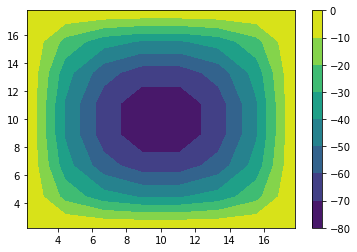

In [17]:
plt.contourf(xv,yv,W1)
plt.xlim(right=20-dx)
plt.xlim(left=dx)
plt.ylim(dx,20-dx)
plt.colorbar()

In [18]:
A2
for i in range (0,n):
    for j in range(0,n):
            A2[i,j]=A2[i,j]-W1[i,j]/d*dx**2
A2

Matrix([
[0, 0,                                                             0,                                                                       0,                                                                       0,                                                                       0,                                                                       0,                                                             0, 0, 0],
[0, 0,                                                             0,                                                                       0,                                                                       0,                                                                       0,                                                                       0,                                                             0, 0, 0],
[0, 0,          -4*w[2, 2] + w[2, 3] + w[3, 2] + 0.00186717265392681,           w[2, 2] - 4*w[2, 3] + w[2, 4] + w[3, 3] + 0.002

In [19]:
A2.row_del(0)
A2.row_del(0)
A2.row_del(-1)
A2.row_del(-1)
A2.col_del(0)
A2.col_del(0)
A2.col_del(-1)
A2.col_del(-1)
A2

Matrix([
[         -4*w[2, 2] + w[2, 3] + w[3, 2] + 0.00186717265392681,           w[2, 2] - 4*w[2, 3] + w[2, 4] + w[3, 3] + 0.00284667306254416,           w[2, 3] - 4*w[2, 4] + w[2, 5] + w[3, 4] + 0.00327520449131424,           w[2, 4] - 4*w[2, 5] + w[2, 6] + w[3, 5] + 0.00327520449131424,           w[2, 5] - 4*w[2, 6] + w[2, 7] + w[3, 6] + 0.00284667306254416,           w[2, 6] - 4*w[2, 7] + w[3, 7] + 0.00186717265392681],
[w[2, 2] - 4*w[3, 2] + w[3, 3] + w[4, 2] + 0.00284667306254416, w[2, 3] + w[3, 2] - 4*w[3, 3] + w[3, 4] + w[4, 3] + 0.00446897061431663, w[2, 4] + w[3, 3] - 4*w[3, 4] + w[3, 5] + w[4, 4] + 0.00520359592077964, w[2, 5] + w[3, 4] - 4*w[3, 5] + w[3, 6] + w[4, 5] + 0.00520359592077964, w[2, 6] + w[3, 5] - 4*w[3, 6] + w[3, 7] + w[4, 6] + 0.00446897061431663, w[2, 7] + w[3, 6] - 4*w[3, 7] + w[4, 7] + 0.00284667306254416],
[w[3, 2] - 4*w[4, 2] + w[4, 3] + w[5, 2] + 0.00327520449131424, w[3, 3] + w[4, 2] - 4*w[4, 3] + w[4, 4] + w[5, 3] + 0.00520359592077964, w[3, 4] + w[4,

In [20]:
Eq1=A2.reshape(1,(n-4)**2)
sols=smp.solve(Eq1,B)


In [21]:
sols.values()
vals = np.fromiter(sols.values(), dtype=float)
np.set_printoptions(threshold=np.inf, linewidth=200)


In [22]:
W=np.zeros((n,n))
for i in range(2,n-2):
    for j in range(2,n-2):
        W[i][j]=vals[(n-4)*(i-2)+(j-2)]

np.set_printoptions(threshold=np.inf, linewidth=200)



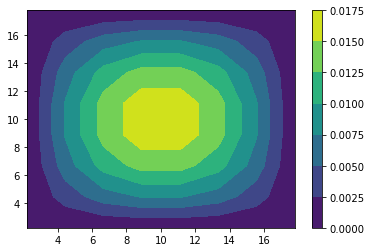

In [23]:
plt.contourf(xv,yv,W)
plt.xlim(right=20-dx)
plt.xlim(left=dx)
plt.ylim(dx,20-dx)
plt.colorbar()